In [45]:
import pandas as pd
import numpy as np
import matplotlib

df = pd.read_csv('data/games.csv')
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1


# 1- Data preprocessing

## 1-1- Missing Values

In [51]:
missing_values = df.isnull().sum()
missing_values

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [52]:
missing_values.sum()

1188

In [54]:
df2 = df.fillna(value = 0)
df2

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25020,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25021,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25022,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [55]:
df2.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.502400e+04,2.502400e+04,2.502400e+04,25024.000000,2.502400e+04,25024.000000,25024.000000,25024.000000,25024.000000,25024.000000,25024.000000,2.502400e+04,25024.000000,25024.000000,25024.000000,25024.000000,25024.000000,25024.000000,25024.000000
mean,2.167942e+07,1.610613e+09,1.610613e+09,2011.513867,1.610613e+09,102.446292,0.458356,0.756199,0.354616,22.577086,43.130794,1.610613e+09,99.602502,0.447199,0.754642,0.347983,21.229699,41.855499,0.588875
std,5.579698e+06,8.636816e+00,8.656774e+00,5.228157,8.636816e+00,14.603631,0.063530,0.111206,0.114760,5.350943,7.135696,8.656774e+00,14.639120,0.062149,0.113551,0.112933,5.284352,7.025156,0.492048
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.060090e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.420000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.411000,0.692000,0.278000,18.000000,37.000000,0.000000
50%,2.120001e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,102.000000,0.459000,0.765000,0.355000,22.000000,43.000000,1.610613e+09,99.000000,0.448000,0.762000,0.349000,21.000000,42.000000,1.000000
75%,2.170012e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,111.000000,0.500000,0.828000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.486000,0.828000,0.421000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.674000,1.000000,1.000000,46.000000,81.000000,1.000000


## 1-2- Find Outliers

<AxesSubplot:xlabel='PTS_home'>

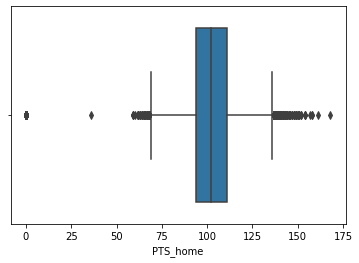

In [76]:
sns.boxplot(x='PTS_home', data=df2)

In [77]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
# Inter Quanitile Range which is a measure of variability in our data
IQR = Q3 - Q1
IQR

GAME_ID            1099222.500
HOME_TEAM_ID            15.000
VISITOR_TEAM_ID         15.000
SEASON                   9.000
TEAM_ID_home            15.000
PTS_home                17.000
FG_PCT_home              0.080
FT_PCT_home              0.132
FG3_PCT_home             0.143
AST_home                 7.000
REB_home                 9.000
TEAM_ID_away            15.000
PTS_away                18.000
FG_PCT_away              0.075
FT_PCT_away              0.136
FG3_PCT_away             0.143
AST_away                 7.000
REB_away                 9.000
HOME_TEAM_WINS           1.000
dtype: float64

In [80]:
# let's print the outliers
# explanation: any data point that is less than Q1 - 1.5 * IQR  or greather than Q3 + 1.5 * IQR  
# is considered as an outlier
outlier = df2 < (Q1 - 1.5 * IQR) or (df2 > (Q3 + 1.5 * IQR))
print(outlier)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().